<a href="https://colab.research.google.com/github/Gayatri-Surapaneni/Mobile-Price-Ranges/blob/main/Online_customers_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Online Retail Customer Segmentation.**

# **Problem Description**
In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Data Description**

**Attribute Information:**

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description: **Product (item) name. Nominal.

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

# **Importing libs and data**

In [1]:
# importing libraris for data manipulation and plotting
import pandas as pd
import datetime as dt
import numpy as np
# import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
#importing kmeans
from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE

In [4]:
# for 3D plots
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual

In [5]:
# for silhouette plots
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [6]:
# ignoring warning for now
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [9]:
# Top 5 rows and columns of data set
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
# Shape of Data set in the form of rows and columns
df.shape

(541909, 8)

In [11]:
# Check Description of data set
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# Let's check Description of data set with another way
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [13]:
 #Check Information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
# Let's Check Number of Unique values for each column
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [15]:
# Check duplicate values Present in data set
len(df[df.duplicated()])

5268

# **NULL Values Handling:**

In [16]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('----'*25)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


From above we can see that Description 0.27% and Customer Id have 24.93% null values
So, we remove null *values* 

Text(0.5, 1.0, ' Visulaizing Missing Values')

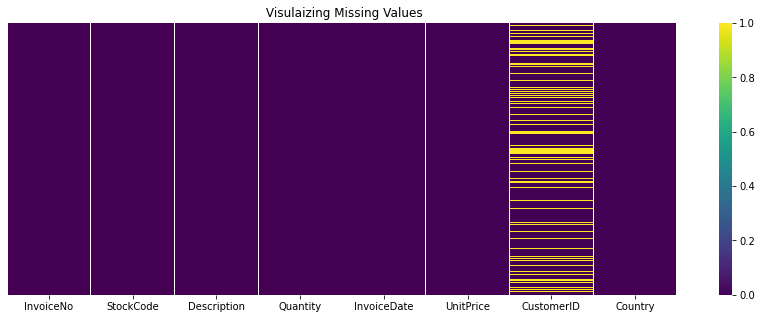

In [18]:
# Let's Visulaizing Null values  With the help of heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='viridis',annot=False,yticklabels=False)
plt.title(" Visulaizing Missing Values")

Missing values in CustomerID and Description column.

Customer Id is identification column ,

null values in column wont effect in analysis , so we will drop all null values

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(406829, 8)

In [21]:
# So, Let's check null values after removing null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now, there are no null values

# **Duplicate values:**

In [22]:
# Check duplicate values present in our data
df.duplicated().sum()

5225

We have seen that, there are 5225 Rows duplicate values present in our data,

So, we will decided to remove this duplicate rows.

In [23]:
df=df[~df.duplicated()]

In [24]:
# After removing duplicate values 
# Let's check the shape of data
df.shape

(401604, 8)

In [25]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Here we can see that min value for Quantity column is negative.

UnitPrice has 0 as min value

Need to Explore these columns

In [26]:
# Let's check dataframe have negative values in quantity

df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Now, Here we See that Invoice number starting with C has negative values and as per description of the data those are cancelations. so we need to drop

In [27]:
# Changing the datatype to str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [28]:
# String to be searched in start of string 
search ="C"

  
# Boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)

  
# Displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [29]:
cancel_order.shape

(8872, 8)

In [30]:
cancel_order_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_order_percentage

2.209141343213713

**Cancel order percentage 2.209% , so we remove the cancel order data**

In [31]:
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [32]:
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7501
1,Germany,453
2,EIRE,247
3,France,148
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


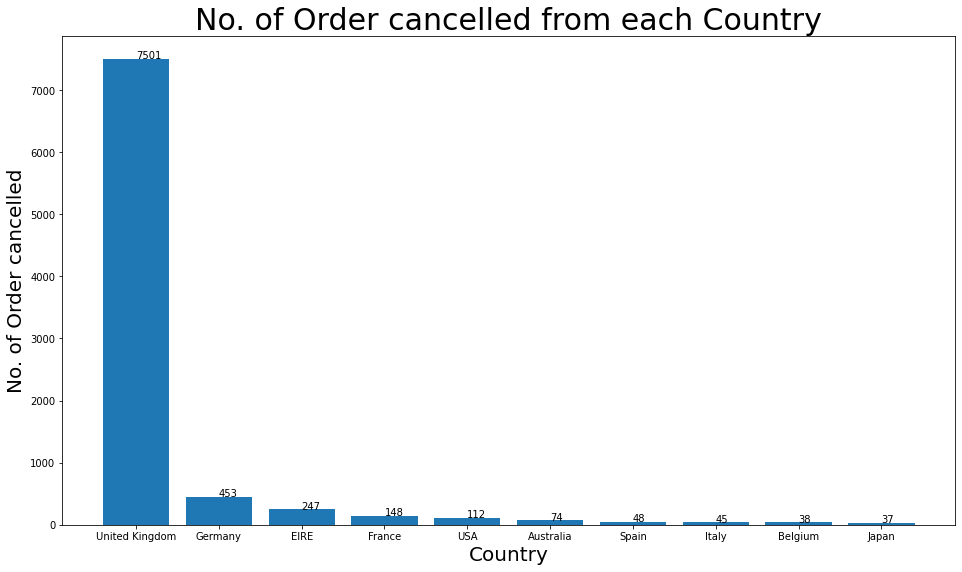

In [33]:
# Figure Size
plt.figure(figsize=(16,9))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# Creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

In [34]:
# Also If Invoice No starts with C means it's a cancellation. We need to drop this entries.
df=df[~df['InvoiceNo'].str.contains('C')]

In [35]:
# Let's  Check how many values are present for unitprice==0

len(df[df['UnitPrice']==0])

40

**There are exact 40 values are present so will drop this values**

In [36]:
# Taking unitprice values greater than 0.
df=df[df['UnitPrice']>0]
df.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [37]:
df.shape

(392692, 8)

In [38]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# **Feature Engineering:**

In [39]:
print(df[df['InvoiceDate']=='12/13/10 9:02'].index.values)

[26732 26733 26734 26735 26736 26737 26738 26739 26740 26741 26742 26743
 26744 26745 26746 26747 26748]


In [40]:
# Converting Invoice Date to datetime. 
# Invoice Date is in format of 01-12-2010 08:26.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m-%d-%Y %H:%M")

In [41]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [42]:
# Extracting month from the Invoice date
df['Month']=df['InvoiceDate'].dt.month_name()

In [43]:
# Extracting day from the Invoice date
df['Day']=df['InvoiceDate'].dt.day_name()

In [44]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


In [46]:
df.year.unique()

array([2010, 2011])

# **Exploratory Data Analysis:**

**Top country based on customer count** 

In [47]:
top_5_countries=df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})

In [48]:
# Let's choose top 5 country based on customer 
top_5_countries.head()

,Country,Customer_count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


In [49]:
# Let's choose bottom 5 country based on customer 
top_5_countries.tail()

,Country,Customer_count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


Text(0.5, 0, 'Country Name')

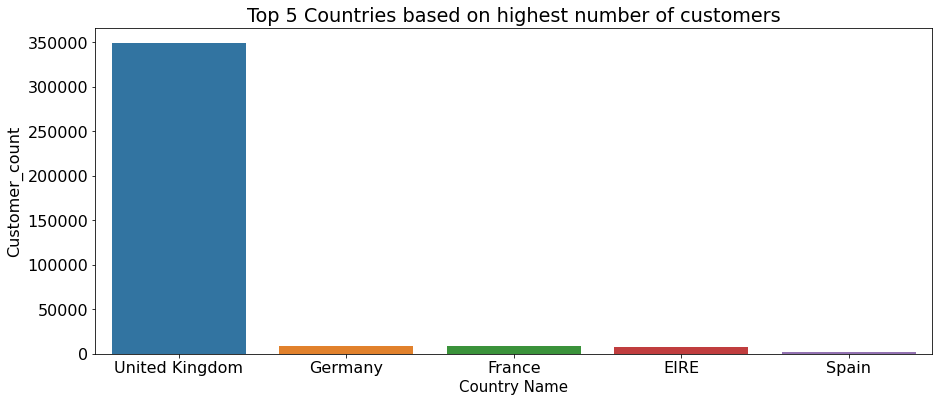

In [50]:
# Let's see Top 5 countries where max sell happens.
plt.figure(figsize=(15,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')
plt.xlabel("Country Name",fontsize='15')

# **Top product based on description:**

In [51]:
top_5_product=df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'})

In [52]:
# Let's check Top 5 products 
top_5_product.head(5)

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


In [53]:
# Let's check bottom 5 products
top_5_product.tail(5)

,Product_name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Top 5 products')

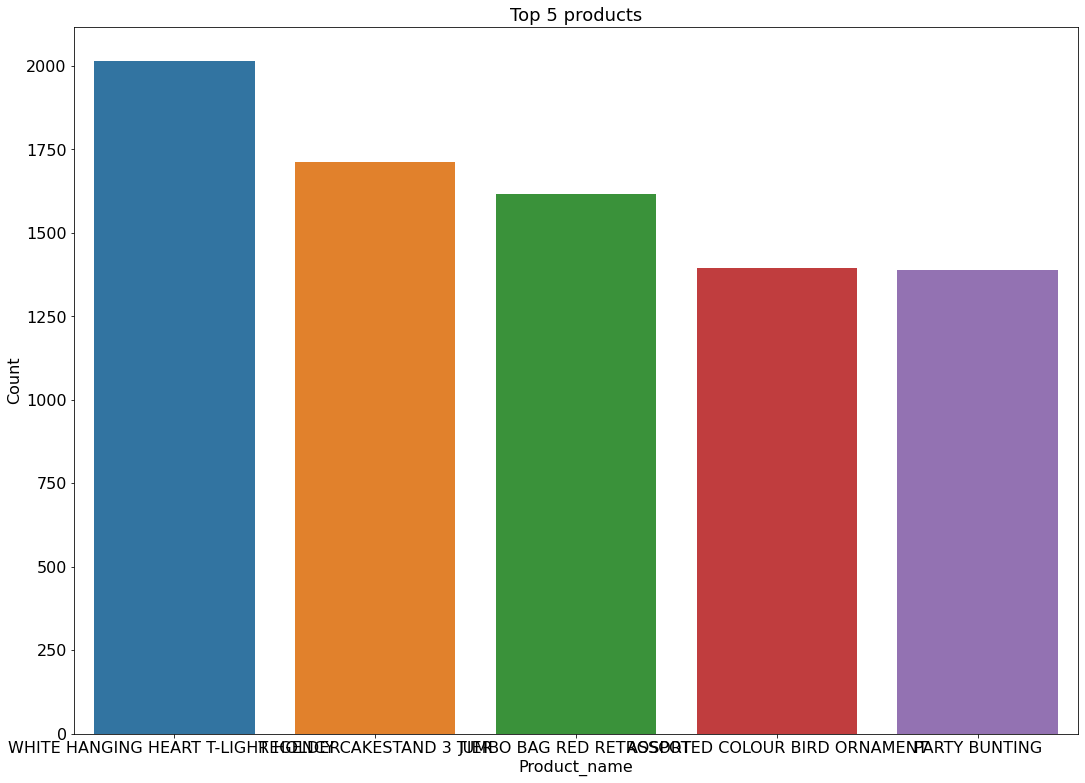

In [54]:
# Now, Check Top 5 product in terms of description
plt.figure(figsize=(18,13))
plt.rcParams['font.size'] = '16'
sns.barplot(x=top_5_product['Product_name'].head(),y=top_5_product['Count'])
plt.title('Top 5 products',fontsize='18')

**Top product based on maximum selling are :**

1.WHITE HANGING HEART T-LIGHT HOLDER.

2.REGENCY CAKESTAND 3 TIER.

3.JUMBO BAG RED RETROSPOT.

4.ASSORTED COLOUR BRID ORNAMENT.

5.PARTY BUNTING.

**Bottom Five product:**

In [55]:
bottom_5_product=df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(5)
bottom_5_product

,Product_name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Bottom 5 products')

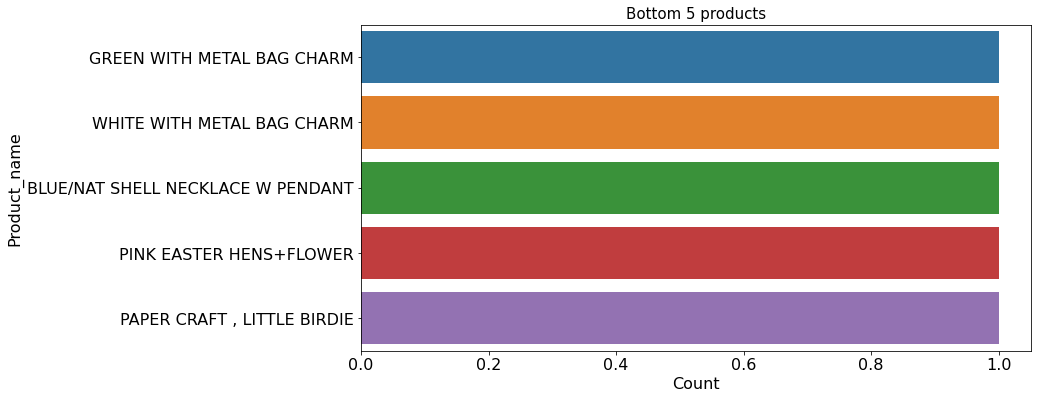

In [56]:
# Ten bottom product in terms of description
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=bottom_5_product['Count'],y=bottom_5_product['Product_name'])
plt.title('Bottom 5 products', fontsize='15')

**Bottom Five Product based on the selling are:**

1.Green with Metal Bag Charm

2.White with Metal Bag Charm

3.Blue/Net Shell Necklace W Pendant

4.Pink Easter Hens+ Flower

5.Paper Craft, Little Birdie

**TOP FIVE ITEM IN TERMS OF STOCK CODE**

In [57]:
top_5_StockCodes=df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(5)
top_5_StockCodes

,StockCode,Count
0,85123A,2023
1,22423,1713
2,85099B,1615
3,84879,1395
4,47566,1389


Text(0.5, 1.0, 'Top 5 products in terms of Stock Code')

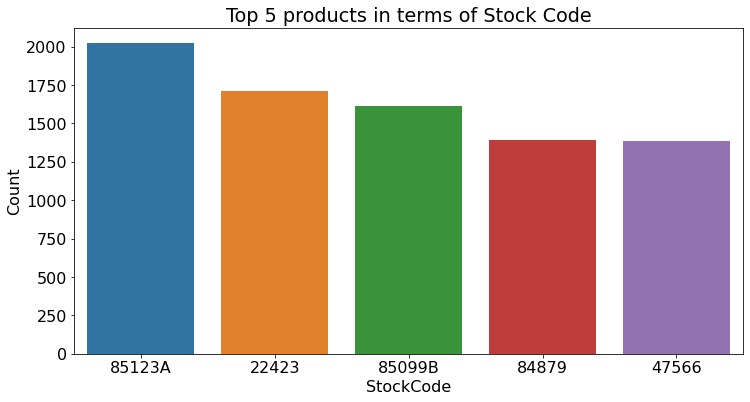

In [58]:
# Top Ten product in terms of Stcok Code
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=top_5_StockCodes['StockCode'],y=top_5_StockCodes['Count'])
plt.title('Top 5 products in terms of Stock Code')

**Top Five Stocks name based on selling are :**

85123A

22423

85099B

84879

47566

**Top Ten customer who are more frequent:**

In [59]:
top_10_customers=df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

,CustomerID,Products_purchasing_Count
0,17841.0,7676
1,14911.0,5670
2,14096.0,5111
3,12748.0,4412
4,14606.0,2677
5,15311.0,2366
6,14646.0,2076
7,13089.0,1814
8,13263.0,1667
9,14298.0,1637


Text(0.5, 1.0, 'Top 10 frequent Customers.')

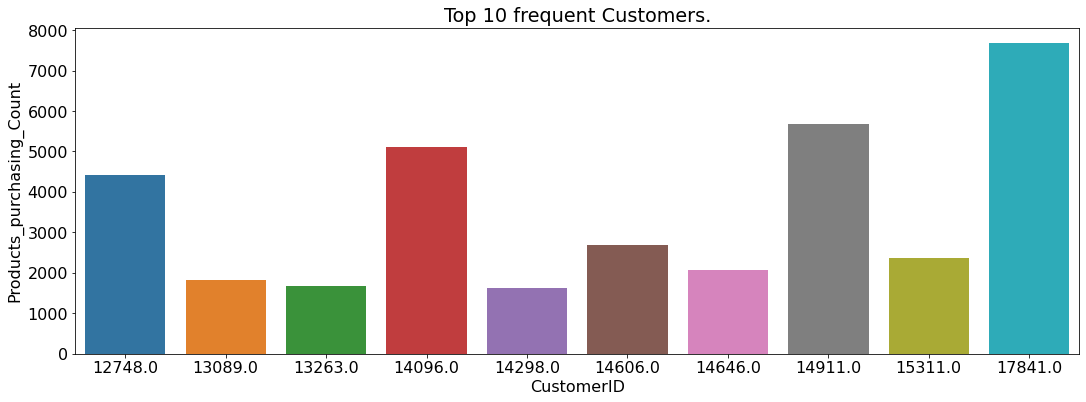

In [60]:
# Top Ten frequent Customers
plt.figure(figsize=(18,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

**Observation:**

CustomerID- 17841 had purchased highest number of products

CustomerID-14911 is the 2nd higest customer who purchased the most the products

**Sales in month:**

In [61]:
sales_in_month = df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

,Month,Sales_count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


Text(0.5, 1.0, 'Sales count in different Months ')

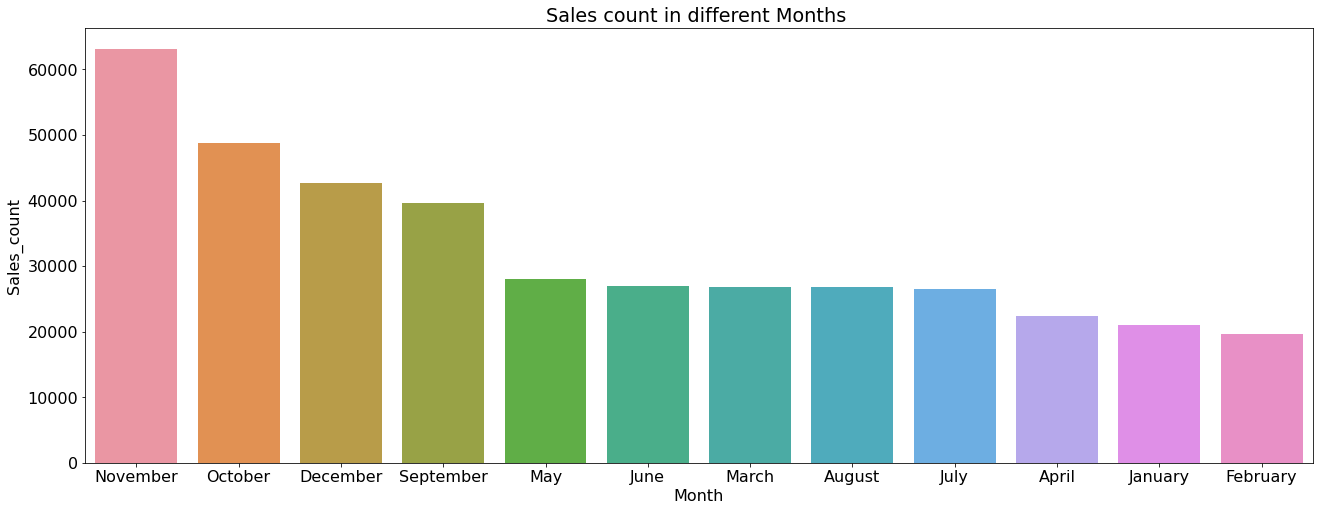

In [62]:
# Sales count in different months.
plt.figure(figsize=(22,8))
plt.rcParams['font.size'] = '16'
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')

**Observations:**

Most of the sale happened in November month.

February Month had least sales.

**Sales in week days:**

In [63]:
sales_on_day_basis = df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

,Day,Sale_count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


Text(0.5, 1.0, 'Sales count on different Days ')

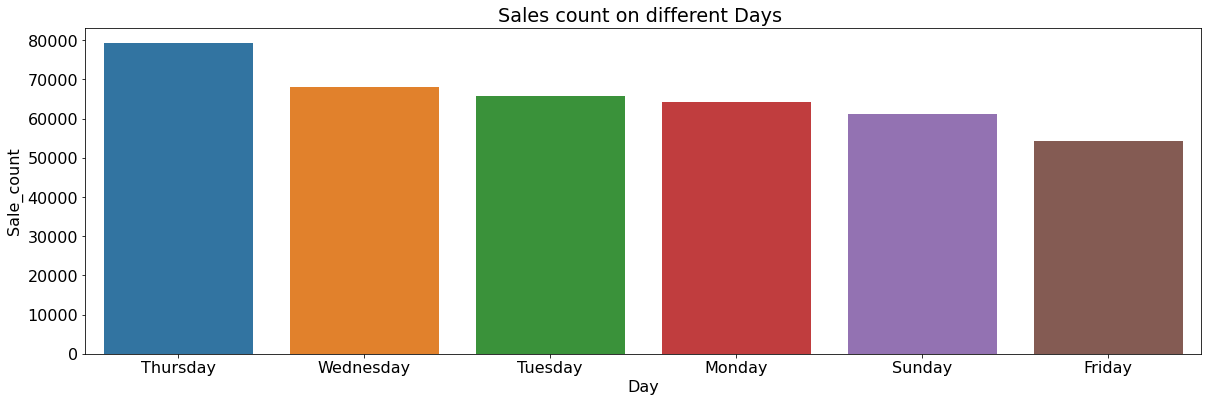

In [64]:
# Sales count on different days.
plt.figure(figsize=(20,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

**Observation:**

1)Sales On Thursdays are high.

2)Sales On Fridays are less

**Hourly Sales:**

In [65]:
df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [66]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening' 

In [67]:
df['Day_time_type']=df['hour'].apply(time)

In [68]:
sales_timing=df['Day_time_type'].value_counts().reset_index().rename(columns={'index':'Day_time_type','Day_time_type':'Sales_count'})
sales_timing

,Day_time_type,Sales_count
0,Afternoon,268654
1,Morning,117132
2,Evening,6906


Text(0.5, 1.0, 'Sales count in different day timings')

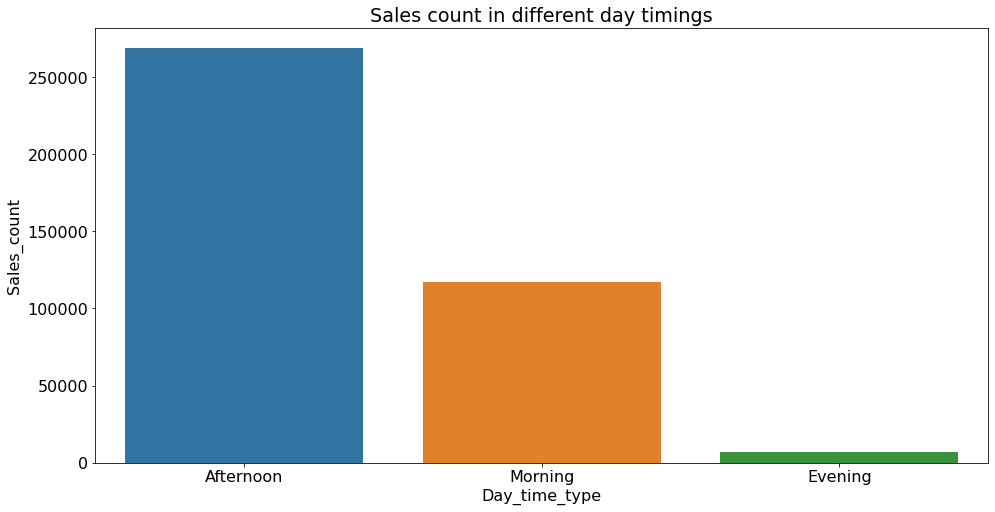

In [69]:
# Sales count on different days.
plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = '16'
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'])
plt.title('Sales count in different day timings')

**Observations:**

1)Most of the sales happens in the afternoon.

2)Least sales happens in the evening.

**Average amount by customers:**

In [70]:
avg_amount=df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)
#avg_amount.sort_values('Avg_amount_per_customer',ascending=False)

Text(0.5, 1.0, 'Average amount spent by each Customer')

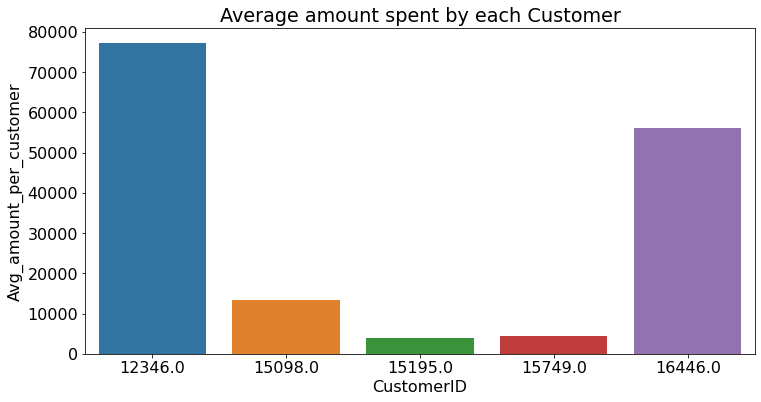

In [71]:
# Sales count on different days.
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = '16'
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(5))
plt.title('Average amount spent by each Customer')

Here ,

1)Customer ID 12346 Average amount spent by each customer is high

2)customer ID 15195 and 15749 amount spent by each customer is low

# **What is RFM?**

**RFM** is a method used to analyze customer value. RFM stands for RECENCY, FREQUENCY, and MONETARY.

**RECENCY**: How recently did the customer visit our website or how recently did a customer purchase?

**Frequency**: How often do they visit or how often do they purchase?

**Monetary:** How much revenue we get from their visit or how much do they spend when they purchase?

**Why it is Needed?**

RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.

The RFM Analysis will help the business to segment their customer base into different homogenous groups so that they can engage with each group with different target marketing strategies.

In [72]:
# Recency = Latest Date - Last Inovice Data, 
# Frequency = count of invoice no. of transaction(s), 
# Monetary = Sum of Total 
# Amount for each customer

import datetime as dt

# Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

# Create RFM Modelling scores for each customer
rfm_dataframe = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Convert Invoice Date into type int
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [73]:
# Descriptive Stats = Recency
rfm_dataframe.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.059474,90.523744,2048.688081
std,100.012264,225.506968,8985.230220
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,306.482500
50%,50.000000,41.000000,668.570000
75%,141.750000,98.000000,1660.597500
max,373.000000,7676.000000,280206.020000


In [74]:
rfm_dataframe.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

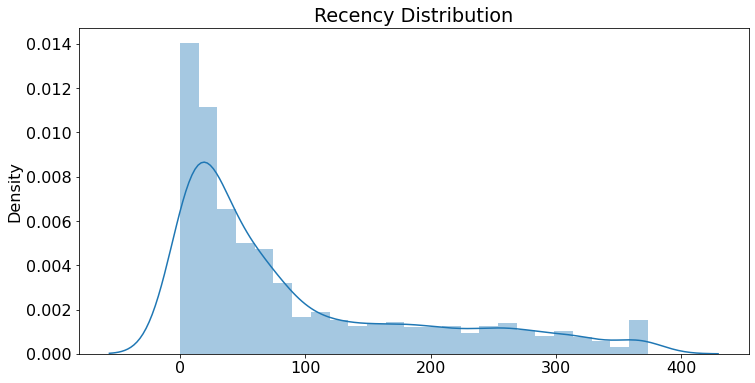

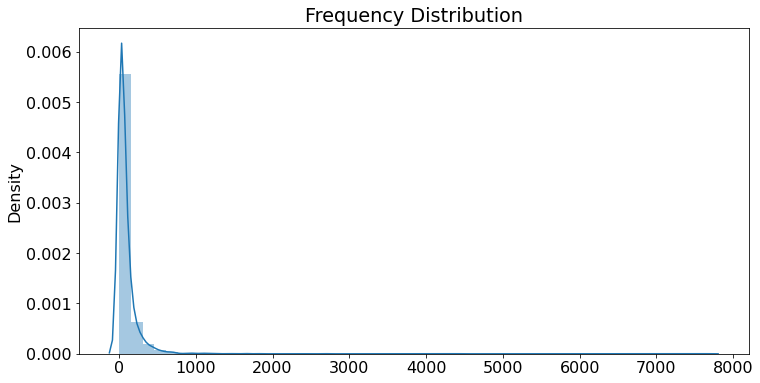

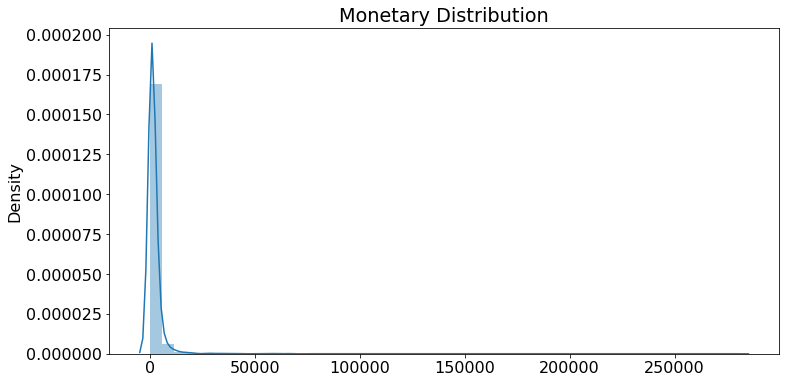

In [75]:
for col in rfm_dataframe:


   plt.figure(figsize=(12,6))
   sns.distplot(x=rfm_dataframe[col])
   plt.title(f'{col} Distribution')

**Distribution of frequency and Monetary is highy skewed:**

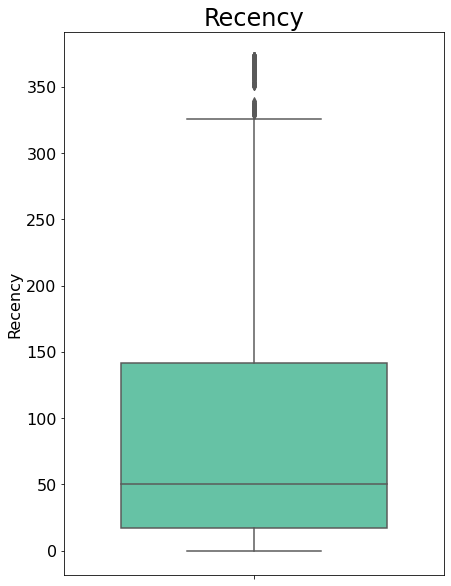

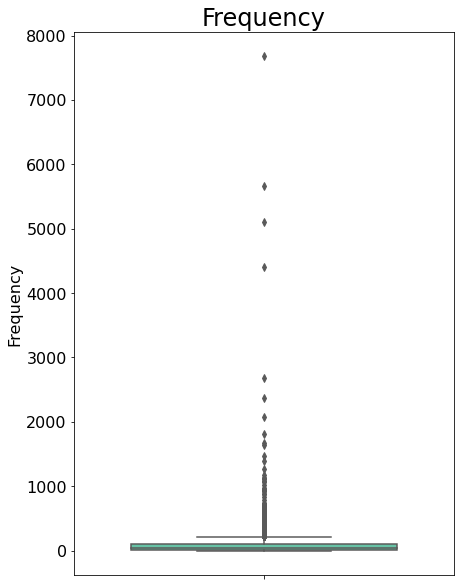

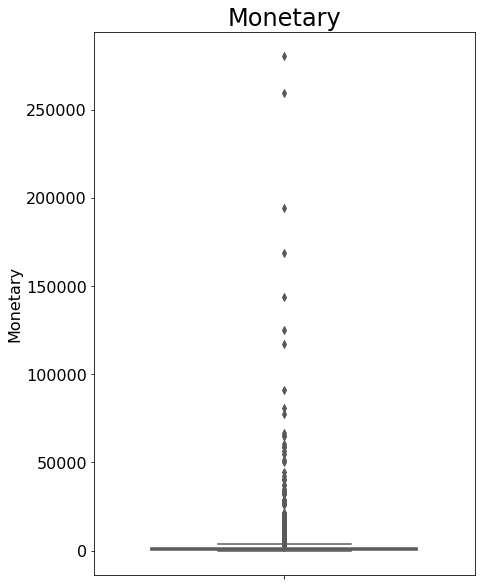

In [76]:
for var in rfm_dataframe :
    plt.rcParams['figure.figsize'] = [20,20]
    plt.figure(figsize=(15,10))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=rfm_dataframe[var],orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
    fig.set_title(f'{var}',size=24)
    fig.set_ylabel(var)

 From above we can see that there are outlier in Recency, frequency and monetary , lets remove outlier

In [77]:
# Removing (statistical) outliers
Q1 = rfm_dataframe.Monetary.quantile(0.05)
Q3 = rfm_dataframe.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_dataframe = rfm_dataframe[(rfm_dataframe.Monetary >= Q1 - 1.5*IQR) & (rfm_dataframe.Monetary <= Q3 + 1.5*IQR)]


# Outlier treatment for Recency
Q1 = rfm_dataframe.Recency.quantile(0.05)
Q3 = rfm_dataframe.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_dataframe = rfm_dataframe[(rfm_dataframe.Recency >= Q1 - 1.5*IQR) & (rfm_dataframe.Recency <= Q3 + 1.5*IQR)]

# Outlier treatment for Frequency
Q1 = rfm_dataframe.Frequency.quantile(0.05)
Q3 = rfm_dataframe.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_dataframe = rfm_dataframe[(rfm_dataframe.Frequency >= Q1 - 1.5*IQR) & (rfm_dataframe.Frequency <= Q3 + 1.5*IQR)]

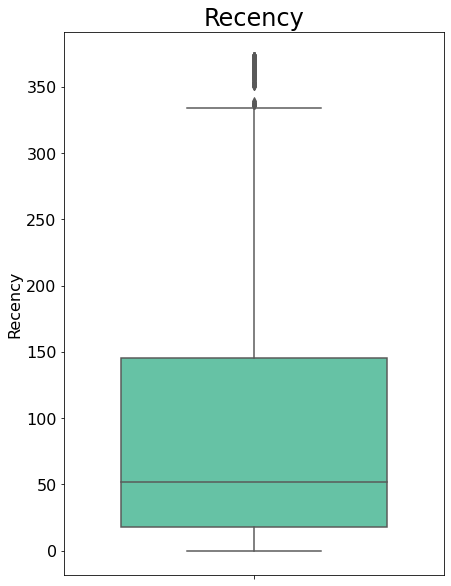

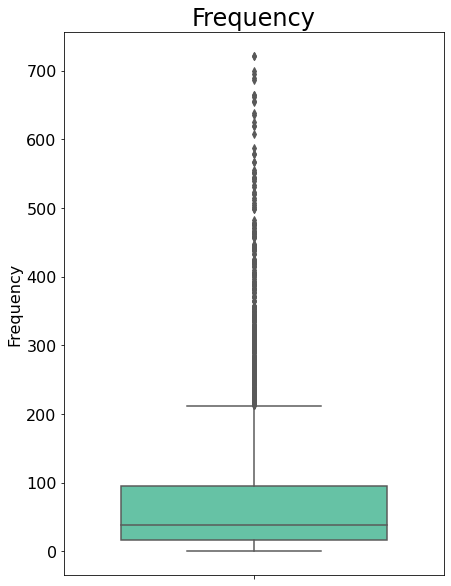

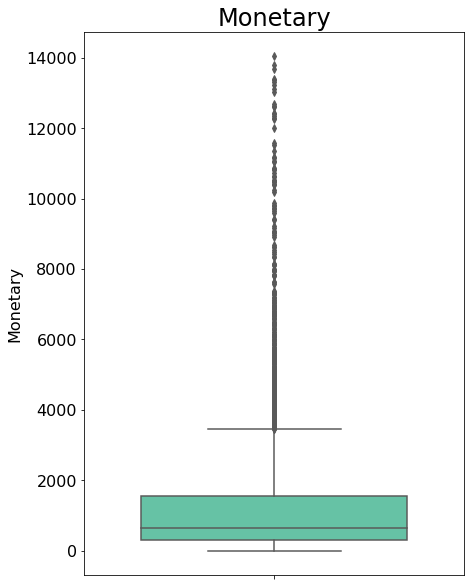

In [78]:
for var in rfm_dataframe :
    plt.rcParams['figure.figsize'] = [20,20]
    plt.figure(figsize=(15,10))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=rfm_dataframe[var],orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
    fig.set_title(f'{var}',size=24)
    fig.set_ylabel(var)

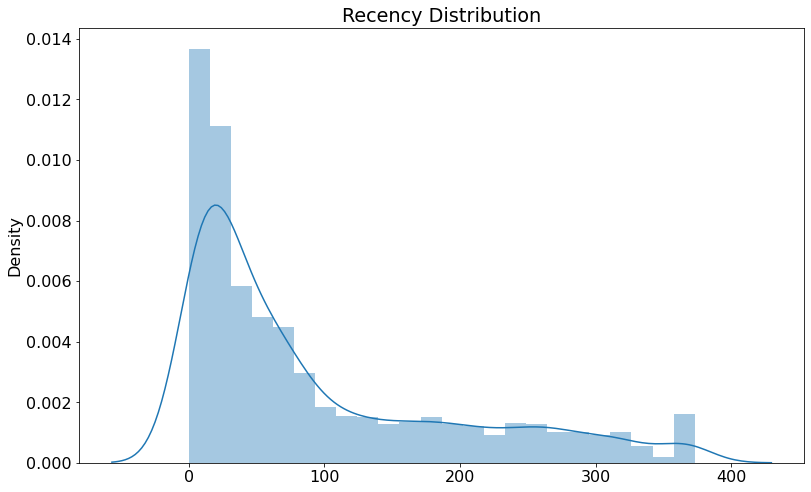

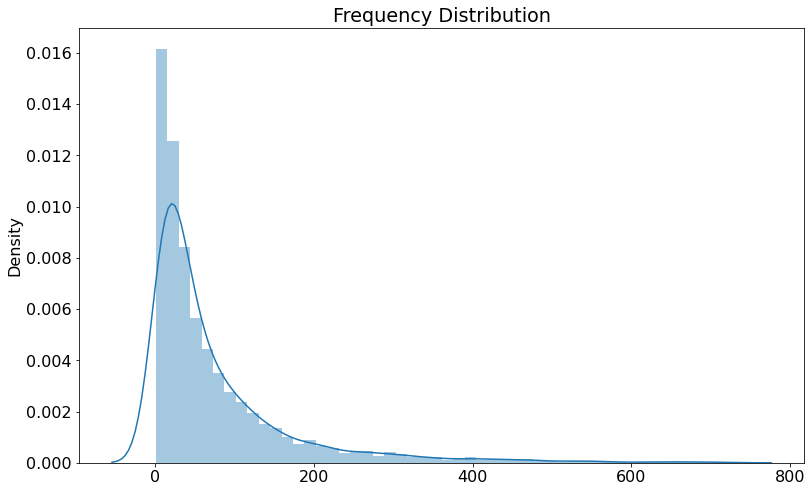

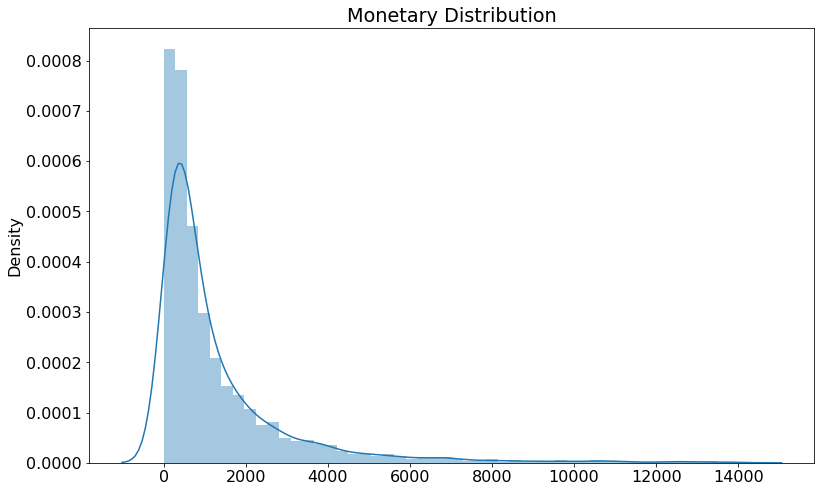

In [79]:
for col in rfm_dataframe:

 
  plt.figure(figsize=(13,8))
  sns.distplot(x=rfm_dataframe[col])
  plt.title(f'{col} Distribution')

In [80]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])

In [81]:
quantile = quantile.to_dict()

In [82]:
quantile

{'Recency': {0.25: 18.0, 0.5: 52.0, 0.75: 145.0},
 'Frequency': {0.25: 17.0, 0.5: 39.0, 0.75: 95.0},
 'Monetary': {0.25: 302.69999999999993, 0.5: 652.8, 0.75: 1567.4799999999998}}

In [83]:
# 1)Converting quantiles to a dictionary, easier to use.

# 2)quantiles = quantiles.to_dict()

# 3)Functions to create R, F and M segments

# 4)arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

# 5)lower the recency, good for the company




def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1                               
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

        # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
        # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [84]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,1,2,1
12350.0,310,17,334.40,4,4,3
12352.0,36,85,2506.04,2,2,1


In [85]:
# Let's  Add a new column to combine RFM score
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [86]:
# Now, Calculate and Add RFMScore value column showing total sum of RFM Group values
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,1,2,1,121,4
12350.0,310,17,334.40,4,4,3,443,11
12352.0,36,85,2506.04,2,2,1,221,5


In [87]:
rfm_dataframe['RFM_Score'].unique()

array([ 3,  7,  4, 11,  5, 12,  8,  6,  9, 10])

**Assign loyalty level as per RFM score:**

In [88]:
# Assign loyalty Level to each customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12347.0,2,182,4310.00,1,1,1,111,3,Platinaum
1,12348.0,75,31,1797.24,3,3,1,331,7,Gold
2,12349.0,18,73,1757.55,1,2,1,121,4,Platinaum
3,12350.0,310,17,334.40,4,4,3,443,11,Bronz
4,12352.0,36,85,2506.04,2,2,1,221,5,Platinaum
5,12353.0,204,4,89.00,4,4,4,444,12,Bronz
6,12354.0,232,58,1079.40,4,2,2,422,8,Gold
7,12355.0,214,13,459.40,4,4,3,443,11,Bronz
8,12356.0,22,59,2811.43,2,2,1,221,5,Platinaum
9,12357.0,33,131,6207.67,2,1,1,211,4,Platinaum


In [89]:
# Validate the data For RFM group = 111
rfm_dataframe[rfm_dataframe['RFM_Score'] == 3].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,16705.0,0,270,14034.99,1,1,1,111,3,Platinaum
1,12681.0,14,638,13787.54,1,1,1,111,3,Platinaum
2,12621.0,1,467,13689.67,1,1,1,111,3,Platinaum
3,12433.0,0,420,13375.87,1,1,1,111,3,Platinaum
4,15498.0,2,512,13316.40,1,1,1,111,3,Platinaum
5,17735.0,2,690,13110.02,1,1,1,111,3,Platinaum
6,16525.0,2,183,13027.45,1,1,1,111,3,Platinaum
7,14258.0,9,111,12669.98,1,1,1,111,3,Platinaum
8,13078.0,3,358,12627.94,1,1,1,111,3,Platinaum
9,15640.0,4,476,12416.11,1,1,1,111,3,Platinaum


In [90]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 4].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12540.0,19,478,13400.24,2,1,1,211,4,Platinaum
1,12477.0,22,300,13219.74,2,1,1,211,4,Platinaum
2,12536.0,43,261,12601.83,2,1,1,211,4,Platinaum
3,17340.0,29,407,12353.29,2,1,1,211,4,Platinaum
4,15125.0,25,127,11528.48,2,1,1,211,4,Platinaum
5,17107.0,33,416,10797.48,2,1,1,211,4,Platinaum
6,13340.0,45,134,10736.48,2,1,1,211,4,Platinaum
7,17865.0,30,370,10526.32,2,1,1,211,4,Platinaum
8,16843.0,42,378,10196.57,2,1,1,211,4,Platinaum
9,12567.0,22,446,9401.28,2,1,1,211,4,Platinaum


In [91]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 5].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12557.0,16,33,11990.96,1,3,1,131,5,Platinaum
1,12409.0,78,109,11072.67,3,1,1,311,5,Platinaum
2,16180.0,100,162,10254.18,3,1,1,311,5,Platinaum
3,16656.0,22,73,8625.80,2,2,1,221,5,Platinaum
4,14952.0,59,138,8099.49,3,1,1,311,5,Platinaum
5,13629.0,23,59,7792.36,2,2,1,221,5,Platinaum
6,16745.0,86,355,7180.70,3,1,1,311,5,Platinaum
7,13324.0,36,75,7121.95,2,2,1,221,5,Platinaum
8,16652.0,58,118,6773.97,3,1,1,311,5,Platinaum
9,13225.0,3,32,6463.84,1,3,1,131,5,Platinaum


In [92]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 6].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,16000.0,2,9,12393.70,1,4,1,141,6,Gold
1,12939.0,64,47,11581.80,3,2,1,321,6,Gold
2,13093.0,275,159,7832.47,4,1,1,411,6,Gold
3,17396.0,39,27,7330.80,2,3,1,231,6,Gold
4,12798.0,10,8,6977.04,1,4,1,141,6,Gold
5,12830.0,37,38,6814.64,2,3,1,231,6,Gold
6,16532.0,17,4,6748.80,1,4,1,141,6,Gold
7,15939.0,89,76,6115.01,3,2,1,321,6,Gold
8,17850.0,372,297,5391.21,4,1,1,411,6,Gold
9,13802.0,138,60,4599.42,3,2,1,321,6,Gold


In [93]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 7].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12590.0,211,68,9864.26,4,2,1,421,7,Gold
1,12435.0,79,36,7829.89,3,3,1,331,7,Gold
2,13027.0,113,26,6912.00,3,3,1,331,7,Gold
3,16182.0,72,28,6617.65,3,3,1,331,7,Gold
4,14101.0,73,35,5976.79,3,3,1,331,7,Gold
5,16553.0,163,84,5719.82,4,2,1,421,7,Gold
6,15032.0,256,52,4959.10,4,2,1,421,7,Gold
7,14145.0,46,11,3742.20,2,4,1,241,7,Gold
8,17230.0,264,69,3638.41,4,2,1,421,7,Gold
9,12643.0,128,24,3344.64,3,3,1,331,7,Gold


In [94]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 8].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12980.0,157,20,7374.90,4,3,1,431,8,Gold
1,15299.0,67,7,4507.01,3,4,1,341,8,Gold
2,18251.0,87,16,4314.72,3,4,1,341,8,Gold
3,18087.0,98,2,4055.72,3,4,1,341,8,Gold
4,12454.0,56,15,3528.34,3,4,1,341,8,Gold
5,17723.0,127,10,3276.40,3,4,1,341,8,Gold
6,13631.0,99,11,3070.42,3,4,1,341,8,Gold
7,14439.0,319,32,2661.24,4,3,1,431,8,Gold
8,15797.0,113,8,2207.40,3,4,1,341,8,Gold
9,16281.0,72,17,2062.06,3,4,1,341,8,Gold


In [95]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 9].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12755.0,280,4,3811.95,4,4,1,441,9,Silver
1,13135.0,196,1,3096.00,4,4,1,441,9,Silver
2,14828.0,196,17,2139.76,4,4,1,441,9,Silver
3,16754.0,372,2,2002.40,4,4,1,441,9,Silver
4,16698.0,226,5,1998.00,4,4,1,441,9,Silver
5,14935.0,297,10,1784.71,4,4,1,441,9,Silver
6,17152.0,194,14,1689.50,4,4,1,441,9,Silver
7,13791.0,127,11,1516.00,3,4,2,342,9,Silver
8,15057.0,275,25,1489.50,4,3,2,432,9,Silver
9,17553.0,129,2,1487.60,3,4,2,342,9,Silver


In [96]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 10].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,12818.0,261,14,1542.08,4,4,2,442,10,Silver
1,12770.0,210,12,1351.45,4,4,2,442,10,Silver
2,13328.0,316,17,1308.48,4,4,2,442,10,Silver
3,15171.0,331,5,1289.50,4,4,2,442,10,Silver
4,16692.0,256,3,1276.00,4,4,2,442,10,Silver
5,14411.0,310,14,1063.00,4,4,2,442,10,Silver
6,15333.0,208,16,1028.56,4,4,2,442,10,Silver
7,18142.0,157,15,1019.52,4,4,2,442,10,Silver
8,14195.0,201,7,1012.00,4,4,2,442,10,Silver
9,13261.0,268,9,944.10,4,4,2,442,10,Silver


In [97]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 11].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14548.0,150,4,652.80,4,4,3,443,11,Bronz
1,14000.0,211,15,635.66,4,4,3,443,11,Bronz
2,13493.0,275,8,618.63,4,4,3,443,11,Bronz
3,14377.0,191,11,617.05,4,4,3,443,11,Bronz
4,14905.0,157,17,616.15,4,4,3,443,11,Bronz
5,15381.0,213,8,596.85,4,4,3,443,11,Bronz
6,15442.0,248,2,594.00,4,4,3,443,11,Bronz
7,13270.0,366,1,590.00,4,4,3,443,11,Bronz
8,13452.0,259,2,590.00,4,4,3,443,11,Bronz
9,15222.0,318,5,585.00,4,4,3,443,11,Bronz


In [98]:
rfm_dataframe[rfm_dataframe['RFM_Score'] == 12].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,14248.0,318,8,302.58,4,4,4,444,12,Bronz
1,18165.0,177,10,302.46,4,4,4,444,12,Bronz
2,17094.0,322,14,302.00,4,4,4,444,12,Bronz
3,13479.0,200,15,300.95,4,4,4,444,12,Bronz
4,17978.0,365,12,300.92,4,4,4,444,12,Bronz
5,15609.0,184,16,298.48,4,4,4,444,12,Bronz
6,17678.0,263,16,298.11,4,4,4,444,12,Bronz
7,12881.0,275,7,298.00,4,4,4,444,12,Bronz
8,17531.0,190,14,296.70,4,4,4,444,12,Bronz
9,13751.0,288,9,296.25,4,4,4,444,12,Bronz


**From above we see that:**

**RFM score categorised as**

3, 4, 5- Platinum

6, 7, 8- Gold

9, 10- Silver

11, 12- Bronz

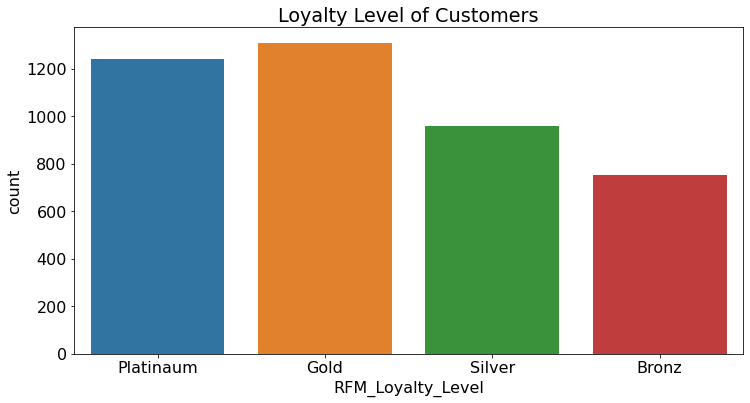

In [99]:
# Let's now, Plot the loyalty level
plt.rcParams['figure.figsize'] = [18,18]
plt.figure(figsize=(12,6))
sns.countplot(rfm_dataframe['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

# **Sentiment Analysis:**

In [100]:
# Folowing table contains our target peoples(Platinum)
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level
0,16705.0,0,270,14034.99,1,1,1,111,3,Platinaum
1,12681.0,14,638,13787.54,1,1,1,111,3,Platinaum
2,12621.0,1,467,13689.67,1,1,1,111,3,Platinaum
3,12540.0,19,478,13400.24,2,1,1,211,4,Platinaum
4,12433.0,0,420,13375.87,1,1,1,111,3,Platinaum
5,15498.0,2,512,13316.40,1,1,1,111,3,Platinaum
6,12477.0,22,300,13219.74,2,1,1,211,4,Platinaum
7,17735.0,2,690,13110.02,1,1,1,111,3,Platinaum
8,16525.0,2,183,13027.45,1,1,1,111,3,Platinaum
9,14258.0,9,111,12669.98,1,1,1,111,3,Platinaum


In [101]:
segmentation_based_on_RFM=rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [102]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency              Monetary  \
                         mean min  max        mean min  max         mean   
RFM_Loyalty_Level                                                          
Platinaum           21.042776   0  143  177.002421  20  721  3015.972672   
Gold                65.471713   0  372   55.526758   1  521  1011.366561   
Silver             125.960375   1  373   23.402503   1   91   406.986206   
Bronz              220.330226  53  373   10.949401   1   39   197.441704   

                                           
                      min       max count  
RFM_Loyalty_Level                          
Platinaum          316.25  14034.99  1239  
Gold               114.34  12393.70  1308  
Silver               6.90   3811.95   959  
Bronz                3.75    652.80   751

In [103]:
# Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
# Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_dataframe['Recency'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Monetary]

# Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_dataframe[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

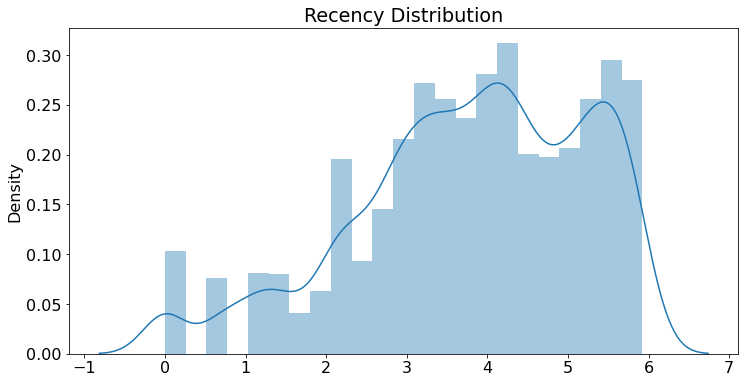

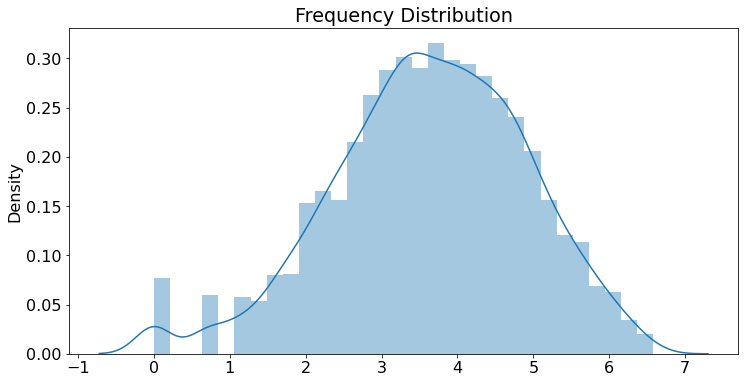

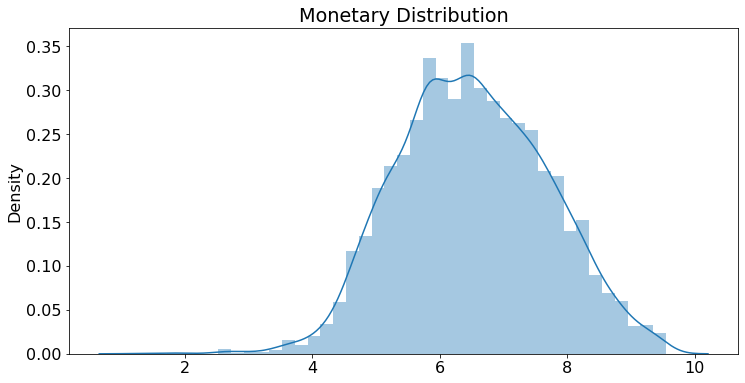

In [104]:
for col in Log_Tfd_Data:

 
  plt.figure(figsize=(12,6))
  sns.distplot(x=Log_Tfd_Data[col])
  plt.title(f'{col} Distribution')

In [106]:
from numpy import math

In [107]:
rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)

In [108]:
rfm_dataframe

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3,Platinaum,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,1,2,1,121,4,Platinaum,2.890372,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338
12352.0,36,85,2506.04,2,2,1,221,5,Platinaum,3.583519,4.442651,7.826459
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,Bronz,5.624018,2.302585,5.196285
18281.0,180,7,80.82,4,4,4,444,12,Bronz,5.192957,1.945910,4.392224
18282.0,7,12,178.05,1,4,4,144,9,Silver,1.945910,2.484907,5.182064


# **1) K-Means Clustering:**

In [109]:
# Importing Libraries

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Recency and Monetary**

Applying Elbow Method on Recency and Monetary

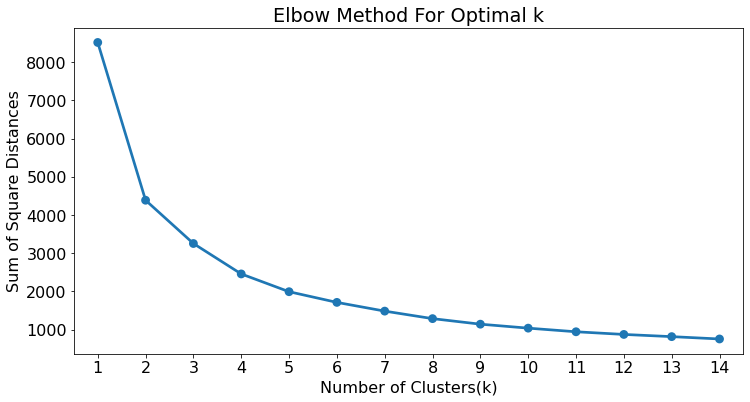

In [110]:
# Taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# Taking only values of recency and monetory in X.
X = rfm_dataframe[Recency_and_Monetary_feat].values

# Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


# Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Now, Here we can see that Optimal value for cluster came out to be 2

Applying Silhouette Score Method on Recency and Monetary:

**Calculation of Silhouette score :**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other.

The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

 Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. 

Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is S=(b−a)max(a,b) .

In [112]:
from sklearn import preprocessing

In [113]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_dataframe[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41631522298381024
For n_clusters = 3, silhouette score is 0.3411226179933084
For n_clusters = 4, silhouette score is 0.3630103768348941
For n_clusters = 5, silhouette score is 0.34415339876044615
For n_clusters = 6, silhouette score is 0.3473939477400451
For n_clusters = 7, silhouette score is 0.3370064075027943
For n_clusters = 8, silhouette score is 0.3456096501497457
For n_clusters = 9, silhouette score is 0.3485276548480009
For n_clusters = 10, silhouette score is 0.33743346858624906
For n_clusters = 11, silhouette score is 0.3451013440321264
For n_clusters = 12, silhouette score is 0.3407491494911406
For n_clusters = 13, silhouette score is 0.3445736388793972
For n_clusters = 14, silhouette score is 0.34049886828514675
For n_clusters = 15, silhouette score is 0.3434489433409848


In [114]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.4161418775896572
For n_clusters = 3 The average silhouette_score is : 0.3421460528052162
For n_clusters = 4 The average silhouette_score is : 0.3643209833464961
For n_clusters = 5 The average silhouette_score is : 0.34157073237690594
For n_clusters = 6 The average silhouette_score is : 0.35255038506702147
For n_clusters = 7 The average silhouette_score is : 0.33788697503477094
For n_clusters = 8 The average silhouette_score is : 0.345614819506377
For n_clusters = 9 The average silhouette_score is : 0.3483692079822465
For n_clusters = 10 The average silhouette_score is : 0.33971245145093387


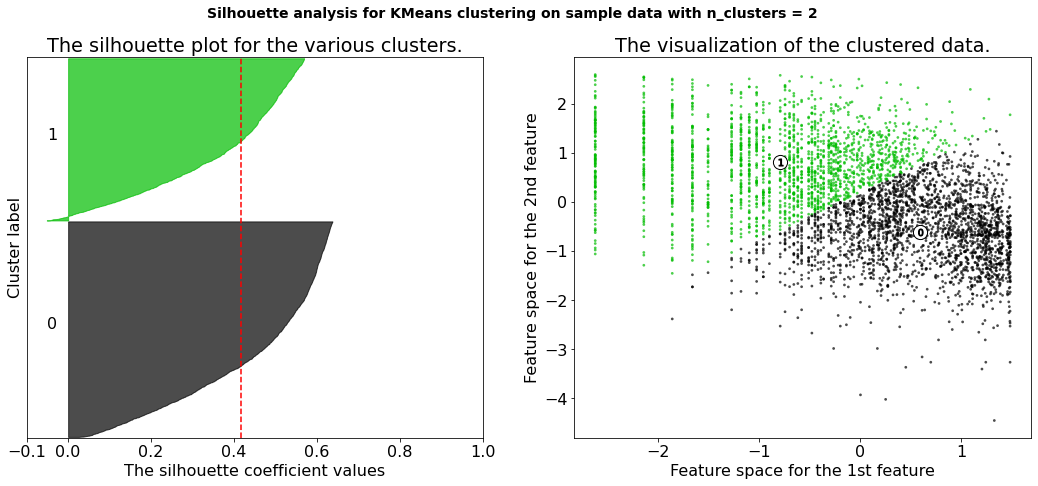

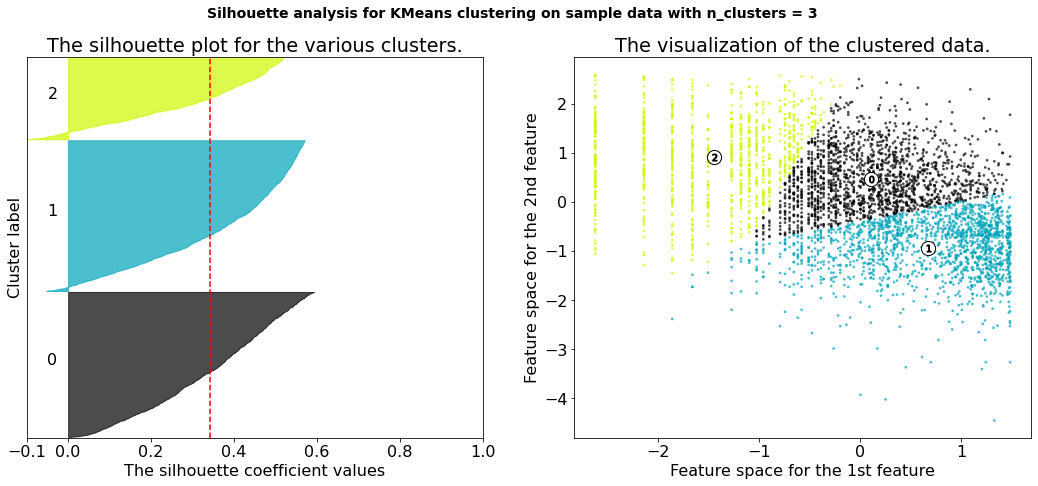

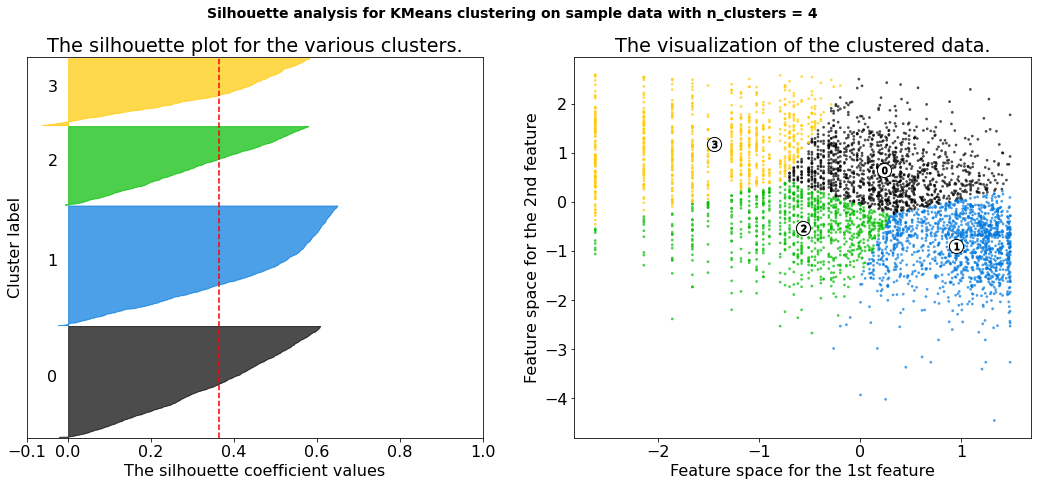

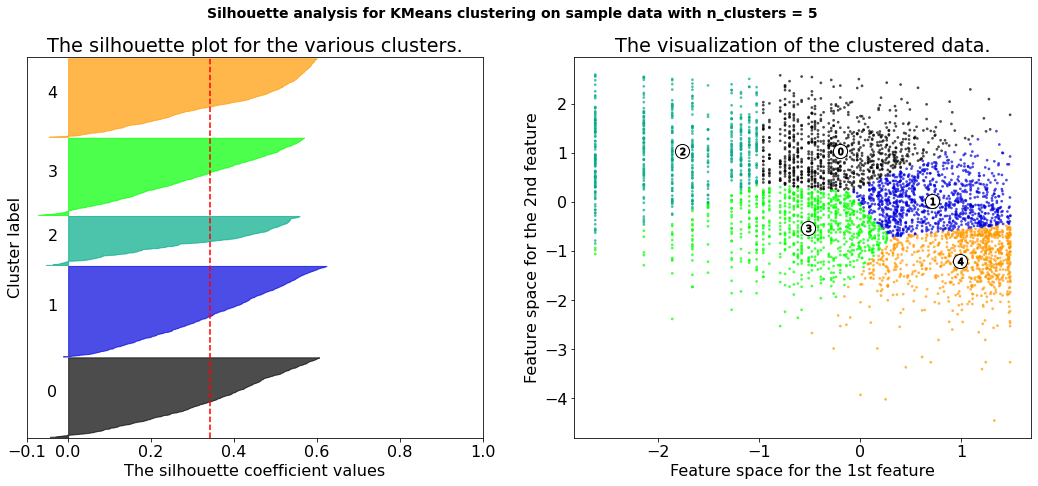

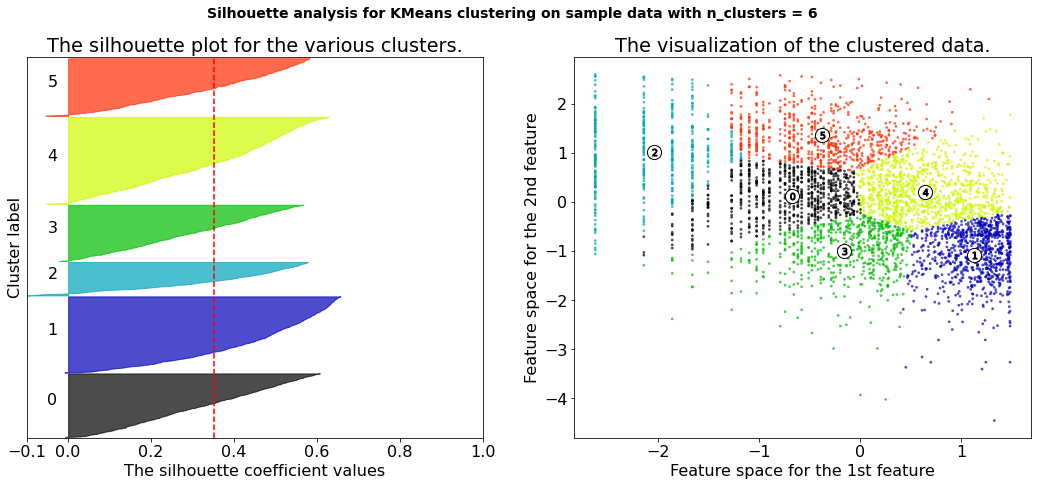

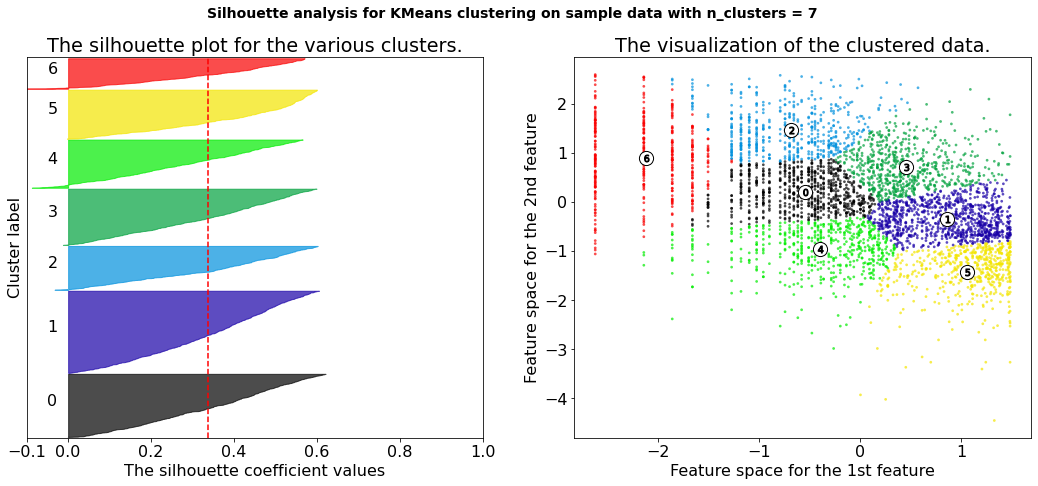

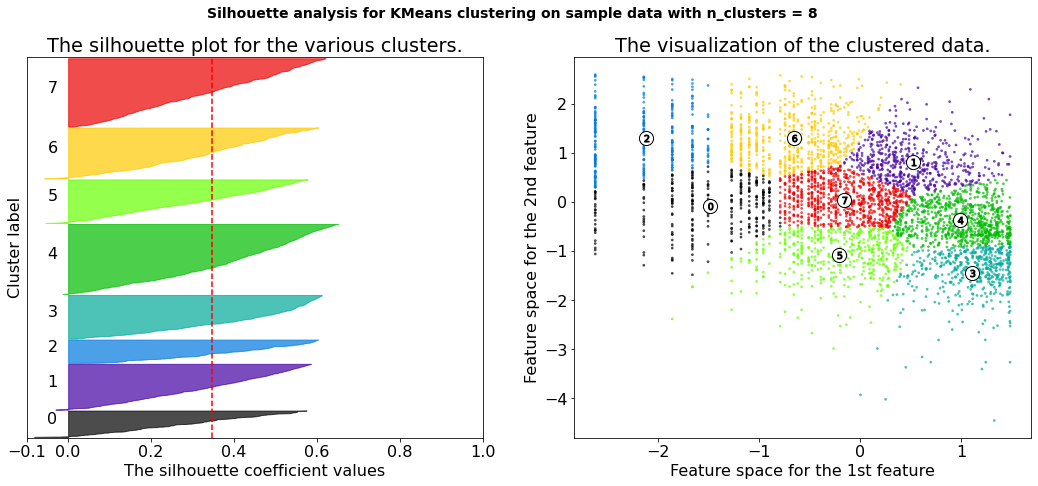

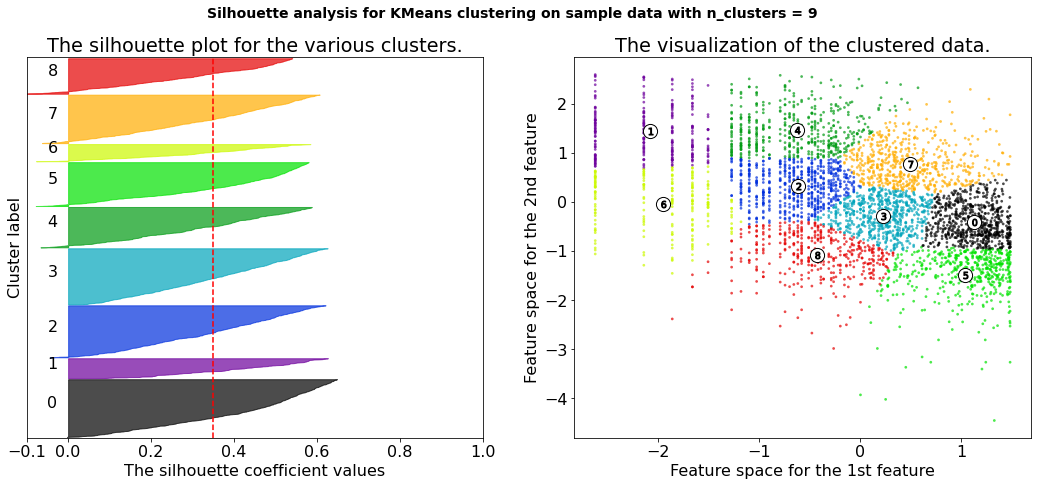

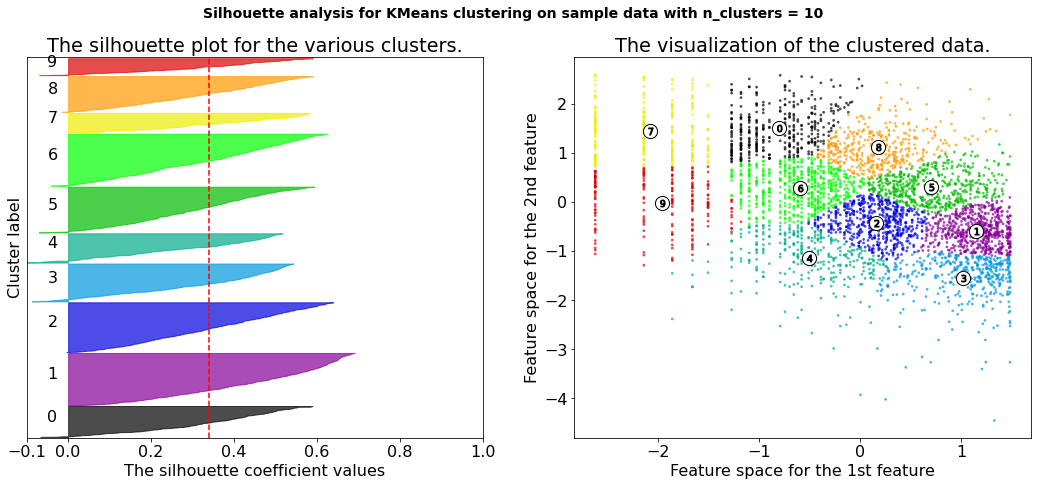

In [117]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Let's Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

     # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

      # Now, Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

         # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Now, Here giving n_clusters=2 on Kmeans Model.**

In [118]:
# applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters=2)
kmeans_rec_mon.fit(X)
y_kmeans= kmeans_rec_mon.predict(X)

In [119]:
# Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_rec_mon.labels_
rfm_dataframe.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon
CustomerID,,,,,,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3,Platinaum,0.693147,5.204007,8.368693,0
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,1,2,1,121,4,Platinaum,2.890372,4.290459,7.471676,0
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,1
12352.0,36,85,2506.04,2,2,1,221,5,Platinaum,3.583519,4.442651,7.826459,0
12353.0,204,4,89.00,4,4,4,444,12,Bronz,5.318120,1.386294,4.488636,1
12354.0,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,1
12355.0,214,13,459.40,4,4,3,443,11,Bronz,5.365976,2.564949,6.129921,1
12356.0,22,59,2811.43,2,2,1,221,5,Platinaum,3.091042,4.077537,7.941449,0


In [120]:
# Centers of the clusters(coordinates)
centers = kmeans_rec_mon.cluster_centers_
centers

array([[-0.78945427,  0.81317496],
       [ 0.59583296, -0.61373592]])

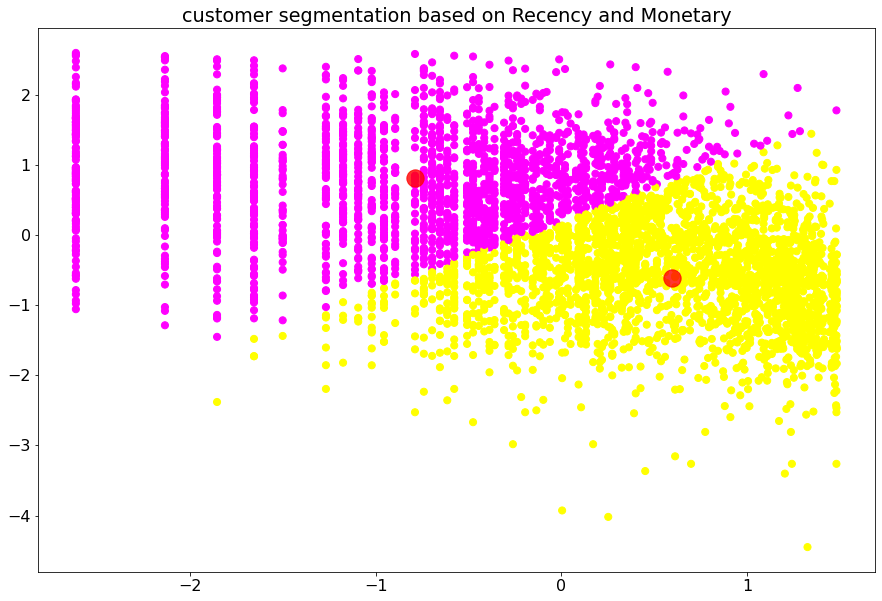

In [121]:
# Ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)